## Pandas DataFrame

* ### Calculating Statistics From Data In A Pandas DataFrame

In [2]:
import pandas as pd

import numpy as np

# Operating System ....
import os

os.listdir("/resources/data/MSTC")

['aapl_ohlc.csv', 'OSA_DB_UPM_Clinical.csv', 'OSA_DB_UPM_Age_Gender.csv']

In [10]:
OSA_Clinical_df = pd.read_csv("/resources/data/MSTC/OSA_DB_UPM_Clinical.csv",sep=',',na_values=['-1'])

In [11]:
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical
0,1,71.0,82.0,168.0,NaN
1,2,29.6,119.0,174.0,48.0
2,3,56.0,NaN,NaN,43.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0


In [12]:
OSA_Clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 5 columns):
ID          617 non-null int64
IAH         607 non-null float64
Weight      616 non-null float64
Height      616 non-null float64
Cervical    610 non-null float64
dtypes: float64(4), int64(1)
memory usage: 24.2 KB


In [4]:
# See thta CSV contains header!
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical
0,1,71.0,82.0,168.0,NaN
1,2,29.6,119.0,174.0,48.0
2,3,56.0,NaN,NaN,43.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0


In [5]:
OSA_Clinical_df.dtypes

ID            int64
IAH         float64
Weight      float64
Height      float64
Cervical    float64
dtype: object

In [6]:
OSA_Clinical_df.dropna().head(5)   #drop all rows that have any NaN values

,ID,IAH,Weight,Height,Cervical
1,2,29.6,119.0,174.0,48.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0
5,6,2.0,109.0,190.0,42.0
6,7,34.0,86.0,169.0,42.0


In [7]:
OSA_Clinical_df=OSA_Clinical_df.dropna()

OSA_Clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 616
Data columns (total 5 columns):
ID          599 non-null int64
IAH         599 non-null float64
Weight      599 non-null float64
Height      599 non-null float64
Cervical    599 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1 KB


In [8]:
OSA_Clinical_df.describe()

,ID,IAH,Weight,Height,Cervical
count,599.000000,599.000000,599.000000,599.000000,599.000000
mean,308.616027,20.147346,87.704508,171.168614,40.631886
std,176.682725,18.144753,18.412257,9.502857,3.969171
min,2.000000,0.000000,45.000000,144.000000,30.000000
25%,155.500000,6.400000,75.000000,165.000000,38.000000
50%,308.000000,14.300000,86.000000,171.000000,41.000000
75%,457.500000,30.000000,98.000000,178.000000,43.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000


In [9]:
OSA_Clinical_df.index

Int64Index([  1,   3,   4,   5,   6,   7,   8,   9,  12,  13,
            ...
            607, 608, 609, 610, 611, 612, 613, 614, 615, 616],
           dtype='int64', length=599)

### Reading Demographic Info

In [16]:
OSA_Demo_df = pd.read_csv("/resources/data/MSTC/OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])

OSA_Demo_df.info()

OSA_Demo_df.dropna().head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 3 columns):
ID        617 non-null int64
Gender    617 non-null int64
Age       614 non-null float64
dtypes: float64(1), int64(2)
memory usage: 14.5 KB


,ID,Gender,Age
0,1,0,39.0
1,2,0,56.0
2,3,0,46.0
3,4,0,39.0
4,5,0,32.0


In [11]:
OSA_Demo_df.iloc[176:180,]

,ID,Gender,Age
176,177,0,58.0
177,178,1,37.0
178,179,0,NaN
179,180,0,NaN


In [12]:
# fill all Na values with 30
Tmp_df=OSA_Demo_df['Age'].fillna(30)

Tmp_df.iloc[176:180,]


176    58.0
177    37.0
178    30.0
179    30.0
Name: Age, dtype: float64

In [13]:
#... mean age...
OSA_Demo_df['Age'].mean()

49.469055374592834

In [15]:
# So: better : ingore them? ... substitute by the mean? other approaches...

OSA_Clinical_df['Age']=OSA_Demo_df['Age'].fillna(OSA_Demo_df['Age'].mean())

OSA_Demo_df.iloc[176:180,]

NameError: name 'OSA_Demo_df' is not defined

In [14]:
# OSA_Demo_df=OSA_Demo_df.dropna()

OSA_Demo_df.info()

NameError: name 'OSA_Demo_df' is not defined

### UNIQUE

In [17]:
## UNIQUE : values in a column

# List of types Gender
Gender_names = pd.unique(OSA_Demo_df['Gender'])
print(Gender_names)

[0 1]


### Some basic stats

In [18]:
#  Calculate the average Age

# Global:
OSA_Demo_df['Age'].describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    614.000000
mean      49.469055
std       12.327168
min       20.000000
25%             NaN
50%             NaN
75%             NaN
max       88.000000
Name: Age, dtype: float64

In [18]:
print('Count = ',OSA_Demo_df['Age'].count())
print('Mean = ', OSA_Demo_df['Age'].mean())
print('Std = ' , OSA_Demo_df['Age'].std())
print('Min = ' , OSA_Demo_df['Age'].min())
print('Max =', OSA_Demo_df['Age'].max())



Count =  617
Mean =  49.4690553746
Std =  12.2971140139
Min =  20.0
Max = 88.0


### GROUPBY  (in this example try with Gender)

In [19]:
# OSA_Demo_df['ID']=OSA_Demo_df['ID'].astype('category').describe()

In [20]:
OSA_Demo_df.index

RangeIndex(start=0, stop=617, step=1)

In [19]:
grouped_data = OSA_Demo_df.groupby('Gender')

In [22]:
type(grouped_data)

pandas.core.groupby.DataFrameGroupBy

In [20]:
# summary statistics for all numeric columns by Gender
# grouped_data.describe()

grouped_data['Age'].describe()


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Gender       
0       count    441.000000
        mean      48.727891
        std       12.525188
        min       20.000000
        25%             NaN
        50%             NaN
        75%             NaN
        max       85.000000
1       count    173.000000
        mean      51.358382
        std       11.629898
        min       26.000000
        25%       42.000000
        50%       51.000000
        75%       60.000000
        max       88.000000
Name: Age, dtype: float64

In [24]:
# provide the mean for each numeric column by sex
grouped_data.mean()

,ID,Age
Gender,,
0,305.855856,48.732899
1,317.069364,51.358382


In [25]:
#### Basic Math Functions:

# Height to power of tw0
OSA_Clinical_df['Height']**2

1      30276.0
3      28224.0
4      29929.0
5      36100.0
6      28561.0
7      29584.0
8      27225.0
9      32400.0
12     32400.0
13     24964.0
14     24336.0
15     27556.0
16     29929.0
17     24964.0
18     23104.0
19     29241.0
20     28561.0
21     31329.0
22     26244.0
23     28900.0
24     30276.0
25     31684.0
26     32400.0
27     24025.0
28     34225.0
29     34225.0
30     25921.0
31     30276.0
32     29584.0
33     27889.0
        ...   
586    29929.0
587    30276.0
588    30625.0
589    31329.0
590    25281.0
591    35344.0
592    22801.0
593    28900.0
594    33856.0
595    33124.0
596    28900.0
597    23104.0
598    26244.0
599    32761.0
600    32400.0
601    31684.0
602    24649.0
603    28224.0
604    30276.0
605    28900.0
607    22500.0
608    33856.0
609    32400.0
610    22500.0
611    32041.0
612    28224.0
613    28561.0
614    23716.0
615    26244.0
616    28561.0
Name: Height, dtype: float64

In [26]:
OSA_Clinical_df['BMI']=np.power(OSA_Clinical_df['Height'],2)

In [27]:
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical,BMI
1,2,29.6,119.0,174.0,48.0,30276.0
3,4,19.7,78.0,168.0,42.0,28224.0
4,5,9.0,80.0,173.0,40.0,29929.0
5,6,2.0,109.0,190.0,42.0,36100.0
6,7,34.0,86.0,169.0,42.0,28561.0


In [28]:
# Applying functions to the data

OSA_Clinical_df['BMI']=OSA_Clinical_df.apply(lambda row: row['Weight']/np.power(row['Height']/100,2), axis=1)

In [29]:
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical,BMI
1,2,29.6,119.0,174.0,48.0,39.305060
3,4,19.7,78.0,168.0,42.0,27.636054
4,5,9.0,80.0,173.0,40.0,26.729927
5,6,2.0,109.0,190.0,42.0,30.193906
6,7,34.0,86.0,169.0,42.0,30.110991


### PLOTS

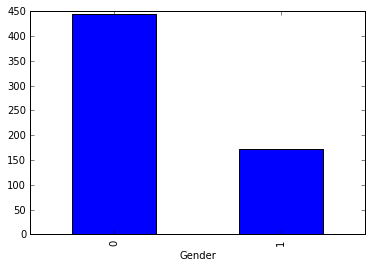

In [30]:
%matplotlib inline

# Plot the number of females / males
gender_counts = OSA_Demo_df.groupby('Gender')['ID'].count()

# create a quick bar chart
gender_counts.plot(kind='bar');

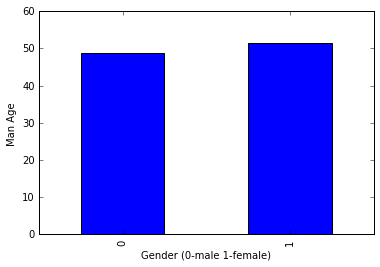

In [31]:
# Plot the mean age of females / males
gender_means = OSA_Demo_df.groupby('Gender')['Age'].mean()

# create a quick bar chart
s_plot=gender_means.plot(kind='bar');

s_plot.set_ylabel("Man Age")
s_plot.set_xlabel("Gender (0-male 1-female)")

## DATA AGREGATION

In [32]:
# how many males have IAH > 30 values?


# JOIN OSA_Demo_df and OSA_Clinical_df
#https://chrisalbon.com/python/pandas_join_merge_dataframe.html

OSA_inner_df = pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='inner')




In [33]:
OSA_inner_df.head(5)

,ID,IAH,Weight,Height,Cervical,BMI,Gender,Age
0,2,29.6,119.0,174.0,48.0,39.305060,0,56.0
1,4,19.7,78.0,168.0,42.0,27.636054,0,39.0
2,5,9.0,80.0,173.0,40.0,26.729927,0,32.0
3,6,2.0,109.0,190.0,42.0,30.193906,0,32.0
4,7,34.0,86.0,169.0,42.0,30.110991,0,39.0


In [34]:
OSA_inner_df.describe()

,ID,IAH,Weight,Height,Cervical,BMI,Gender,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,308.616027,20.147346,87.704508,171.168614,40.631886,29.891201,0.285476,49.502504
std,176.682725,18.144753,18.412257,9.502857,3.969171,5.630683,0.452018,12.349546
min,2.000000,0.000000,45.000000,144.000000,30.000000,18.590125,0.000000,20.000000
25%,155.500000,6.400000,75.000000,165.000000,38.000000,26.070325,0.000000,40.000000
50%,308.000000,14.300000,86.000000,171.000000,41.000000,28.734672,0.000000,49.000000
75%,457.500000,30.000000,98.000000,178.000000,43.000000,32.770513,1.000000,59.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000,63.654952,1.000000,88.000000


In [35]:
print('Number males IAH > 30 = ', len(OSA_inner_df[OSA_inner_df.IAH> 30]))

#len(OSA_inner_df[OSA_inner_df['IAH']> 30])

Number males IAH > 30 =  142


### Other types of join (merge)

In [36]:
OSA_left = pd.merge(left=OSA_Clinical_df,right=OSA_Demo_df, how='left', left_on='ID', right_on='ID')

In [37]:
OSA_left.describe()

,ID,IAH,Weight,Height,Cervical,BMI,Gender,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,308.616027,20.147346,87.704508,171.168614,40.631886,29.891201,0.285476,49.502504
std,176.682725,18.144753,18.412257,9.502857,3.969171,5.630683,0.452018,12.349546
min,2.000000,0.000000,45.000000,144.000000,30.000000,18.590125,0.000000,20.000000
25%,155.500000,6.400000,75.000000,165.000000,38.000000,26.070325,0.000000,40.000000
50%,308.000000,14.300000,86.000000,171.000000,41.000000,28.734672,0.000000,49.000000
75%,457.500000,30.000000,98.000000,178.000000,43.000000,32.770513,1.000000,59.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000,63.654952,1.000000,88.000000


In [38]:
# Merge with outer join

OSA_outer=pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='outer')

In [39]:
OSA_outer.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,IAH,Weight,Height,Cervical,BMI,Gender,Age
count,617.000000,599.000000,599.000000,599.000000,599.000000,599.000000,617.000000,617.000000
mean,309.000000,20.147346,87.704508,171.168614,40.631886,29.891201,0.280389,49.469055
std,178.256837,18.144753,18.412257,9.502857,3.969171,5.630683,0.449554,12.297114
min,1.000000,0.000000,45.000000,144.000000,30.000000,18.590125,0.000000,20.000000
25%,155.000000,NaN,NaN,NaN,NaN,NaN,0.000000,40.000000
50%,309.000000,NaN,NaN,NaN,NaN,NaN,0.000000,49.000000
75%,463.000000,NaN,NaN,NaN,NaN,NaN,1.000000,59.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000,63.654952,1.000000,88.000000


In [40]:
OSA_outer.tail(20)

,ID,IAH,Weight,Height,Cervical,BMI,Gender,Age
597,616.0,9.6,80.0,162.0,37.0,30.483158,1,41.000000
598,617.0,6.1,83.0,169.0,44.0,29.060607,0,69.000000
599,1.0,NaN,NaN,NaN,NaN,NaN,0,39.000000
600,3.0,NaN,NaN,NaN,NaN,NaN,0,46.000000
601,11.0,NaN,NaN,NaN,NaN,NaN,0,29.000000
602,12.0,NaN,NaN,NaN,NaN,NaN,0,48.000000
603,79.0,NaN,NaN,NaN,NaN,NaN,0,50.000000
604,179.0,NaN,NaN,NaN,NaN,NaN,0,49.469055
605,180.0,NaN,NaN,NaN,NaN,NaN,0,49.469055
606,181.0,NaN,NaN,NaN,NaN,NaN,0,49.469055


In [41]:
OSA_inner_df.dtypes

ID            int64
IAH         float64
Weight      float64
Height      float64
Cervical    float64
BMI         float64
Gender        int64
Age         float64
dtype: object

In [42]:
OSA_outer.dtypes

ID          float64
IAH         float64
Weight      float64
Height      float64
Cervical    float64
BMI         float64
Gender        int64
Age         float64
dtype: object

In [43]:
OSA_outer['ID']=OSA_outer['ID'].astype('int')

In [44]:
OSA_outer.dtypes

ID            int64
IAH         float64
Weight      float64
Height      float64
Cervical    float64
BMI         float64
Gender        int64
Age         float64
dtype: object

In [45]:
OSA_outer.tail(20)

,ID,IAH,Weight,Height,Cervical,BMI,Gender,Age
597,616,9.6,80.0,162.0,37.0,30.483158,1,41.000000
598,617,6.1,83.0,169.0,44.0,29.060607,0,69.000000
599,1,NaN,NaN,NaN,NaN,NaN,0,39.000000
600,3,NaN,NaN,NaN,NaN,NaN,0,46.000000
601,11,NaN,NaN,NaN,NaN,NaN,0,29.000000
602,12,NaN,NaN,NaN,NaN,NaN,0,48.000000
603,79,NaN,NaN,NaN,NaN,NaN,0,50.000000
604,179,NaN,NaN,NaN,NaN,NaN,0,49.469055
605,180,NaN,NaN,NaN,NaN,NaN,0,49.469055
606,181,NaN,NaN,NaN,NaN,NaN,0,49.469055


## Let's analyze <font color=brown>OSA_inner_df</font> and use Python ML <font color=blue>sklearn</font> for Multiple Linear Regression

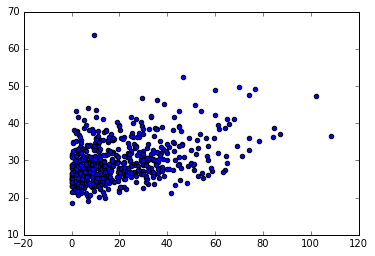

In [46]:
#### Scatter Plots
import matplotlib.pyplot as plt

plt.scatter(x=OSA_inner_df['IAH'].values, y=OSA_inner_df['BMI'].values)
plt.show()

In [59]:
# Change size of all plots 

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 12

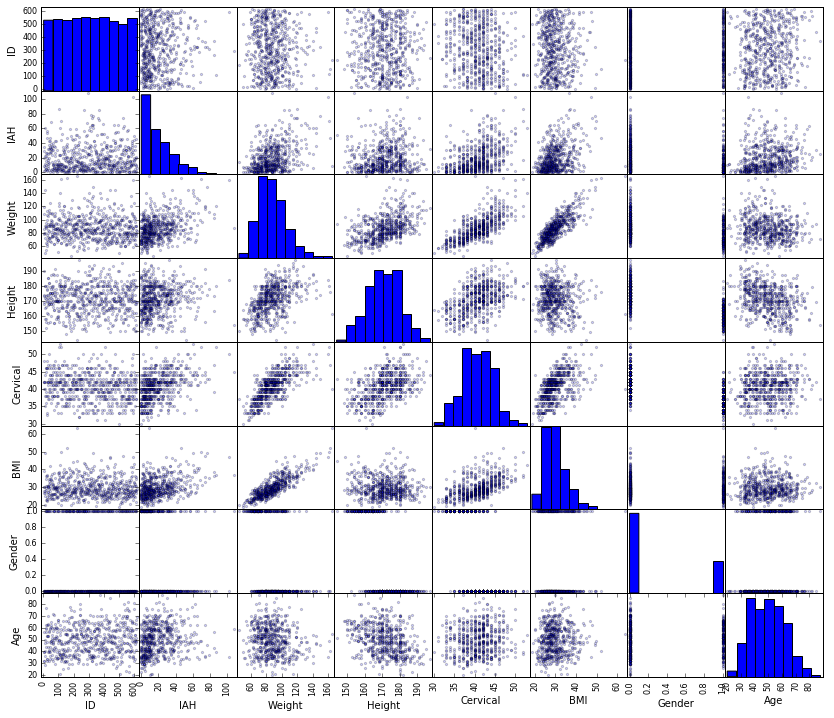

In [60]:
figure = pd.tools.plotting.scatter_matrix(OSA_inner_df, alpha=0.2)

plt.show()

In [69]:
# Set ID as index 

OSA_inner_df.set_index('ID', inplace=True)

In [71]:
# The whole corr matrix
Corr_matrix=OSA_inner_df.corr()

In [70]:
OSA_inner_df.head(5)

,IAH,Weight,Height,Cervical,BMI,Gender,Age
ID,,,,,,,
2,29.6,119.0,174.0,48.0,39.305060,0,56.0
4,19.7,78.0,168.0,42.0,27.636054,0,39.0
5,9.0,80.0,173.0,40.0,26.729927,0,32.0
6,2.0,109.0,190.0,42.0,30.193906,0,32.0
7,34.0,86.0,169.0,42.0,30.110991,0,39.0


In [72]:
Corr_matrix

,IAH,Weight,Height,Cervical,BMI,Gender,Age
IAH,1.000000,0.407314,0.104435,0.428931,0.381927,-0.193713,0.163585
Weight,0.407314,1.000000,0.463731,0.721886,0.839758,-0.333230,-0.133738
Height,0.104435,0.463731,1.000000,0.459095,-0.080901,-0.676934,-0.326519
Cervical,0.428931,0.721886,0.459095,1.000000,0.530051,-0.606353,0.089495
BMI,0.381927,0.839758,-0.080901,0.530051,1.000000,0.029673,0.047943
Gender,-0.193713,-0.333230,-0.676934,-0.606353,0.029673,1.000000,0.090490
Age,0.163585,-0.133738,-0.326519,0.089495,0.047943,0.090490,1.000000


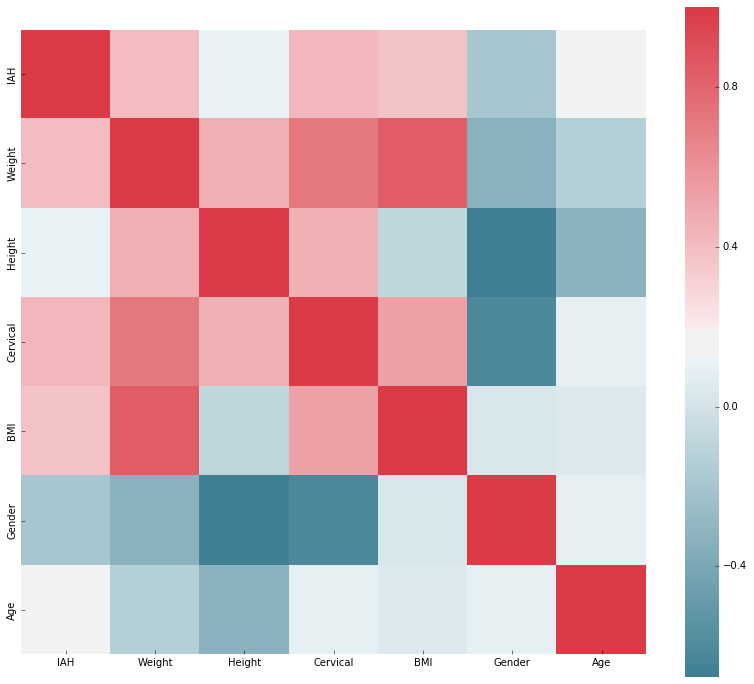

In [73]:
# PLOT Corr Matrix
import seaborn as sns

sns.heatmap(Corr_matrix,
            mask=np.zeros_like(Corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [76]:

### Picking predictor columns

# Get all the columns from the dataframe.
columns = OSA_inner_df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["IAH","Gender"]]

# Store the variable we'll be predicting on.
target = "IAH"

In [77]:
columns

['Weight', 'Height', 'Cervical', 'BMI', 'Age']

In [79]:
## Splitting into train and test sets

# Import a convenience function to split the sets.

from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = OSA_inner_df.sample(frac=0.8, random_state=1)


# Select anything not in the training set and put it in the testing set.
test = OSA_inner_df.loc[~OSA_inner_df.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)


(479, 7)
(120, 7)


In [92]:
# Fitting a linear regression

# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
Trained_model=model.fit(train[columns], train[target])

In [97]:
### Predicting Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

317.10540782898664

In [94]:
### Predicting Training Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(train[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, train[target])

229.9549693500143

### Getting statistical info with <font color=blue>statsmodels</font> package

In [87]:
! pip install statsmodels


    100% |████████████████████████████████| 6.2MB 165kB/s 
    100% |████████████████████████████████| 235kB 4.3MB/s 


In [91]:
import statsmodels.api as sm

X= train[columns]
X = sm.add_constant(X)
est = sm.OLS(train[target], X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IAH   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     35.42
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           8.55e-31
Time:                        18:42:02   Log-Likelihood:                -1982.0
No. Observations:                 479   AIC:                             3976.
Df Residuals:                     473   BIC:                             4001.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0253     68.450      1.242      0.2